# ANZCA 2023 - Digital Methods Workshop
## Juxtorpus: Understanding your data

### Definitions
**Corpus**

A corpus is a (usually large) collection of documents of a similar kind. An example of a corpus would be essays from a particular author.
Documents in a corpus are typically assumed to be in the same format as each other and to share a theme or subject-matter.

**Metadata**

Metadata is data that describes the dataset in question. Examples of metadata of a news article would be the author or date published. Metadata provides context for data so that we can perform more informed analysis

### Example data set: Internet news data with readers engagement
Access link: https://www.kaggle.com/datasets/szymonjanowski/internet-articles-data-with-users-engagement

Context:

This dataset was created and used in order to determine the popularity of an article before it was published online but thanks to its flexibility can be used in various tasks.
It contains articles (listed as the top in popularity at the publisher website) from multiple well-known publishers. Then using Facebook GraphAPI data was enriched with engagement features such as shares, reactions, and comments count.

Date range: 03-09-2019 to 04-11-2019

### Understanding your data

Data always comes with context and bias. It is part of our job when analysing data to understand the data's context and account for it when drawing conclusions. One method of accounting for the context of data is data cleaning. The following changes to the example data set have been made to more easily achieve our analysis goals:

- only the relevant columns were preserved. Columns such as 'url' have been removed. This speeds up processing times and makes loading easier
- the article contents column has been edited to improve term frequency analysis:
    - most entries in the 'content' column ended with a statement like "… \[+100 chars\]". We can infer that this is not from the articles themselves, but is an artifact of the parsing tool used to gather the articles (most likely to keep the file size small). Performing frequency analysis prior to this amendment yielded "chars" as by far the most frequently used term
- often data analysis tools contain rudamentary data cleaning functionality. In the timeline tool demonstrated in this notebook, there is a checkbox titled "Remove stopwords", which allows the ignoring of terms such as "but", "and", and "the". Be mindful of the data cleaning functionalities available to you so that you don't make unnecessary changes to the data.

### Data Analysis

#### Corpus Loading

In [1]:
from juxtorpus.corpus.corpora import Corpora
from juxtorpus import Jux
from juxtorpus.viz.item_timeline import ItemTimeline

import warnings
warnings.filterwarnings('ignore')

corpora = Corpora()
corpora.widget()

In [3]:
corpus_ls = [corpora.get(c) for c in corpora.items()]
corpus_ls[-1].summary()

,
Name,news-content
Parent,
Corpus Type,Corpus
Number of Documents,10437
Number of Total Words,308567
Size of Vocabulary,27049
mean Words per Document,29
min Words per Document,0
max Words per Document,46
metas,"published_at, source_id"


#### Author publishing frequency

Below we can start to see some patterns and limitations within our example data:
- individual author names are conflated with publication names. We can mitigate this by deselecting the publication names in the visualisation
- some publications have duplicate entries (BBC News and https://www.facebook.com/bbcnews)
- some dates are conspicuously missing any entries at all (Sept 21st to Sept 25th)

In [2]:
corpus_ls = [corpora.get(c) for c in corpora.items()]
corpus = corpus_ls[-1]
corpus.create_custom_dtm(lambda x: [x])
timeline = ItemTimeline.from_corpus(corpus, freq='1d', use_custom_dtm=True)
timeline.widget()

FigureWidget({
    'data': [{'marker': {'color': 'rgba(64,160,0,1.0)'},
              'mode': 'lines+markers+text',
              'name': '<NA>',
              'text': [, , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,
                       1020.0],
              'textfont': {'color': 'crimson'},
              'textposition': 'bottom center',
              'type': 'scatter',
              'uid': 'e9433c5c-d643-42e7-b8b6-8e10b254a2f7',
              'x': [2019-09-03 00:00:00, 2019-09-04 00:00:00, 2019-09-05 00:00:00,
                    2019-09-06 00:00:00, 2019-09-07 00:00:00, 2019-09-08 00:00:00,
                    2019-09-09 00:00:00, 2019-09-10 00:00:00, 2019-09-11 00:00:00,
                    2019-09-12 00:00:00, 2019-09-13 00:00:00, 2019-09-14 00:00:00,
                    2019-09-15 00:00:00, 2019-09-16 00:00:00, 2019-09-17 00:00:00,
                    2019-09-18 00:00:00, 2019-09-19 00:00:00, 2019-09-20 00:00:00,
                    2019-09-21 00:00:00, 2019-09-22 

#### Term frequency over time 

In [4]:
corpus_ls = [corpora.get(c) for c in corpora.items()]
corpus = corpus_ls[-1]
timeline = ItemTimeline.from_corpus(corpus, freq='1d')
timeline.widget()

FigureWidget({
    'data': [{'marker': {'color': 'rgba(38,55,0,1.0)'},
              'mode': 'lines+markers+text',
              'name': 'the',
              'text': [, , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,
                       21226.0],
              'textfont': {'color': 'crimson'},
              'textposition': 'bottom center',
              'type': 'scatter',
              'uid': 'fd9825b0-930a-4a04-8637-6943a6f88cc1',
              'x': [2019-09-03 00:00:00, 2019-09-04 00:00:00, 2019-09-05 00:00:00,
                    2019-09-06 00:00:00, 2019-09-07 00:00:00, 2019-09-08 00:00:00,
                    2019-09-09 00:00:00, 2019-09-10 00:00:00, 2019-09-11 00:00:00,
                    2019-09-12 00:00:00, 2019-09-13 00:00:00, 2019-09-14 00:00:00,
                    2019-09-15 00:00:00, 2019-09-16 00:00:00, 2019-09-17 00:00:00,
                    2019-09-18 00:00:00, 2019-09-19 00:00:00, 2019-09-20 00:00:00,
                    2019-09-21 00:00:00, 2019-09-22 0

#### Term frequency by news source

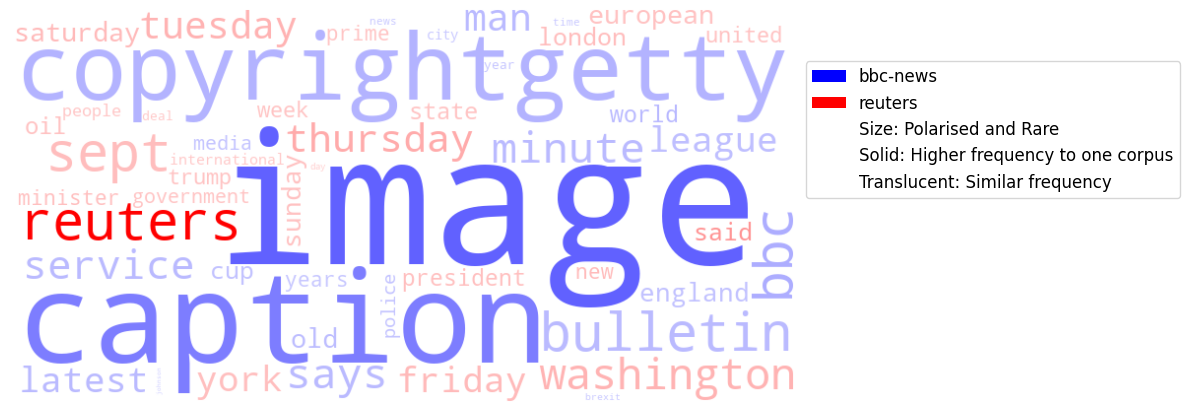

In [5]:
corpus_ls = [corpora.get(c) for c in corpora.items()]
corpus_a = corpus_ls[-1]
corpus_b = corpus_ls[-2]
jux = Jux(corpus_a, corpus_b)
jux.polarity.wordcloud('tf')